Análisis Inicial de Datos

In [137]:
# Importamos librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Carga de Archivos CVS
df_clientes = pd.read_csv('/content/olist_customers_dataset.csv', encoding='latin1')
df_orden_items = pd.read_csv('/content/olist_order_items_dataset.csv', encoding='latin1')
df_pagos = pd.read_csv('/content/olist_order_payments_dataset.csv', encoding='latin1')
df_criticas = pd.read_csv('/content/olist_order_reviews_dataset.csv', encoding='latin1', engine='python', on_bad_lines='skip')
df_orden_dataset = pd.read_csv('/content/olist_orders_dataset.csv', encoding='latin1')
df_productos = pd.read_csv('/content/olist_products_dataset.csv', encoding='latin1')
df_vendedores = pd.read_csv('/content/olist_sellers_dataset.csv', encoding='latin1')
df_categorias = pd.read_csv('/content/product_category_name_translation.csv', encoding='latin1')

In [138]:
# Revusamos los nombres de las columnas para unirlas
df_clientes.info()
print('---')
df_orden_items.info()
print('---')
df_pagos.info()
print('---')
df_criticas.info()
print('---')
df_orden_dataset.info()
print('---')
df_productos.info()
print('---')
df_vendedores.info()
print('---')
df_categorias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  o

In [139]:
df_categorias = df_categorias.rename(columns={'ÿproduct_category_name': 'product_category_name'})
df_consolidado= df_clientes.merge(df_orden_dataset, on='customer_id', how='left')
df_consolidado= df_consolidado.merge(df_orden_items, on='order_id', how='left')
df_consolidado= df_consolidado.merge(df_pagos, on='order_id', how='left')
df_consolidado= df_consolidado.merge(df_criticas, on='order_id', how='left')
df_consolidado= df_consolidado.merge(df_productos, on='product_id', how='left')
df_consolidado= df_consolidado.merge(df_vendedores, on='seller_id', how='left')
df_consolidado= df_consolidado.merge(df_categorias, on='product_category_name', how='left')
df_consolidado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 40 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    119143 non-null  object 
 1   customer_unique_id             119143 non-null  object 
 2   customer_zip_code_prefix       119143 non-null  int64  
 3   customer_city                  119143 non-null  object 
 4   customer_state                 119143 non-null  object 
 5   order_id                       119143 non-null  object 
 6   order_status                   119143 non-null  object 
 7   order_purchase_timestamp       119143 non-null  object 
 8   order_approved_at              118966 non-null  object 
 9   order_delivered_carrier_date   117057 non-null  object 
 10  order_delivered_customer_date  115722 non-null  object 
 11  order_estimated_delivery_date  119143 non-null  object 
 12  order_item_id                 

In [140]:
columnas_relevantes=['customer_id','customer_city','order_id','order_status','order_purchase_timestamp','order_item_id','product_id','seller_id','price','freight_value','product_category_name_english','payment_value','review_score']
df=df_consolidado[columnas_relevantes].copy()

In [141]:
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [142]:
df.rename(columns={'customer_id':'id_cliente',
                   'customer_city':'ciudad_cliente',
                   'order_id':'id_orden',
                   'order_status':'estado_orden',
                   'order_purchase_timestamp':'fecha_orden',
                   'order_item_id':'id_item_orden',
                   'product_id':'id_producto',
                   'seller_id':'id_vendedor',
                   'price':'precio',
                   'freight_value':'valor_envio',
                   'payment_value':'valor_pagado',
                   'product_category_name_english':'categoria_producto_ing',
                   'review_score':'evaluacion'},inplace=True)

In [143]:
# Revisamos valores nulos
df.isnull().sum()

,0
id_cliente,0
ciudad_cliente,0
id_orden,0
estado_orden,0
fecha_orden,0
id_item_orden,833
id_producto,833
id_vendedor,833
precio,833
valor_envio,833


In [144]:
df.dropna(inplace=True)

In [145]:
df.duplicated().sum()

np.int64(1068)

In [146]:
df.drop_duplicates(inplace=True)

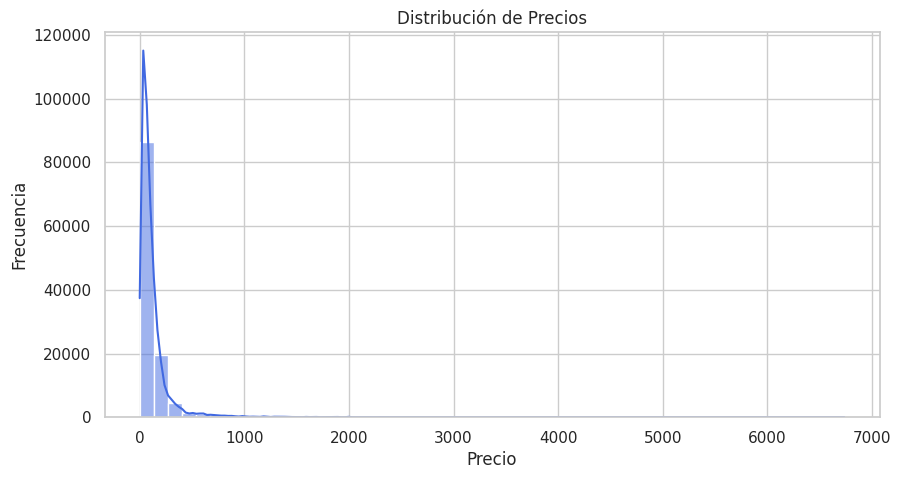

In [147]:
# Hallazgos en Visual studio Core
plt.figure(figsize=(10,5))
sns.histplot(df['precio'], bins=50, kde=True, color='royalblue')
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

In [174]:
# Columnas financieras para la eliminación de outliers
columnas_financieras = ['precio', 'valor_envio', 'valor_pagado']

for col in columnas_financieras:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [150]:
df[['precio','valor_envio','valor_pagado','evaluacion']].describe()

,precio,valor_envio,valor_pagado
count,91364.000000,91364.000000,91364.000000
mean,76.917766,15.715410,104.607238
std,54.751912,5.068852,64.809865
min,0.850000,2.140000,0.000000
25%,34.990000,12.650000,53.850000
50%,59.900000,15.310000,89.480000
75%,104.000000,18.310000,143.822500
max,277.000000,30.630000,302.100000


In [152]:
df['evaluacion'] = pd.to_numeric(df['evaluacion'], errors='coerce')

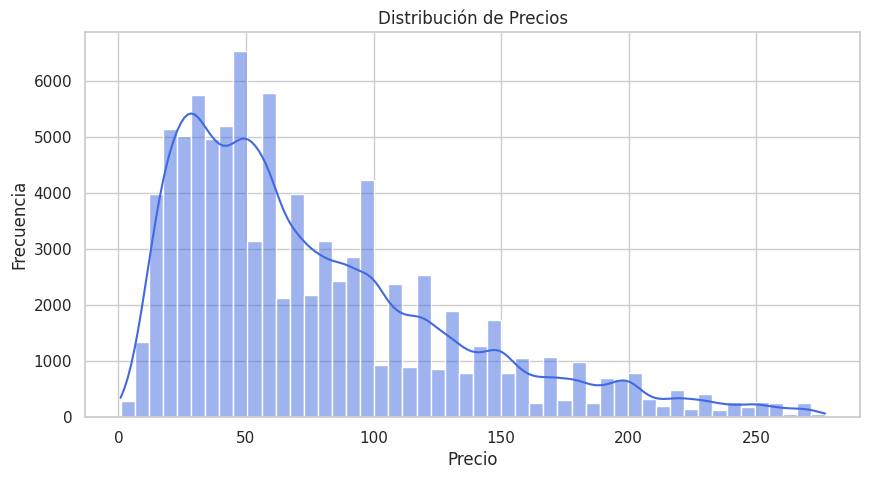

In [153]:
# Hallazgos en Visual Studio Core
plt.figure(figsize=(10, 5))
sns.histplot(df['precio'],bins=50,kde=True, color='royalblue')
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.show()

In [154]:
df[['evaluacion', 'precio', 'valor_envio', 'valor_pagado']].describe()

,evaluacion,precio,valor_envio,valor_pagado
count,91364.000000,91364.000000,91364.000000,91364.000000
mean,4.079287,76.917766,15.715410,104.607238
std,1.350837,54.751912,5.068852,64.809865
min,1.000000,0.850000,2.140000,0.000000
25%,4.000000,34.990000,12.650000,53.850000
50%,5.000000,59.900000,15.310000,89.480000
75%,5.000000,104.000000,18.310000,143.822500
max,5.000000,277.000000,30.630000,302.100000


In [176]:
# Varianza
df[['evaluacion','precio', 'valor_envio', 'valor_pagado']].var()

,0
evaluacion,1.816730
precio,2843.405569
valor_envio,25.568428
valor_pagado,3858.645825


In [156]:
df[['evaluacion','precio', 'valor_envio', 'valor_pagado']].std() # desv. estándar

,0
evaluacion,1.350837
precio,54.751912
valor_envio,5.068852
valor_pagado,64.809865


In [157]:
# Moda categoría
category_mode = df['categoria_producto_ing'].mode()[0]
print("Moda de la categoría:", category_mode)
vendedor_mode = df['id_vendedor'].mode()[0]
print("Moda del vendedor:", vendedor_mode)
time_mode = df['fecha_orden'].mode()[0]
print("Moda del tiempo:", time_mode)

Moda de la categoría: bed_bath_table
Moda del vendedor: 6560211a19b47992c3666cc44a7e94c0
Moda del tiempo: 2017-09-23 14:56:45


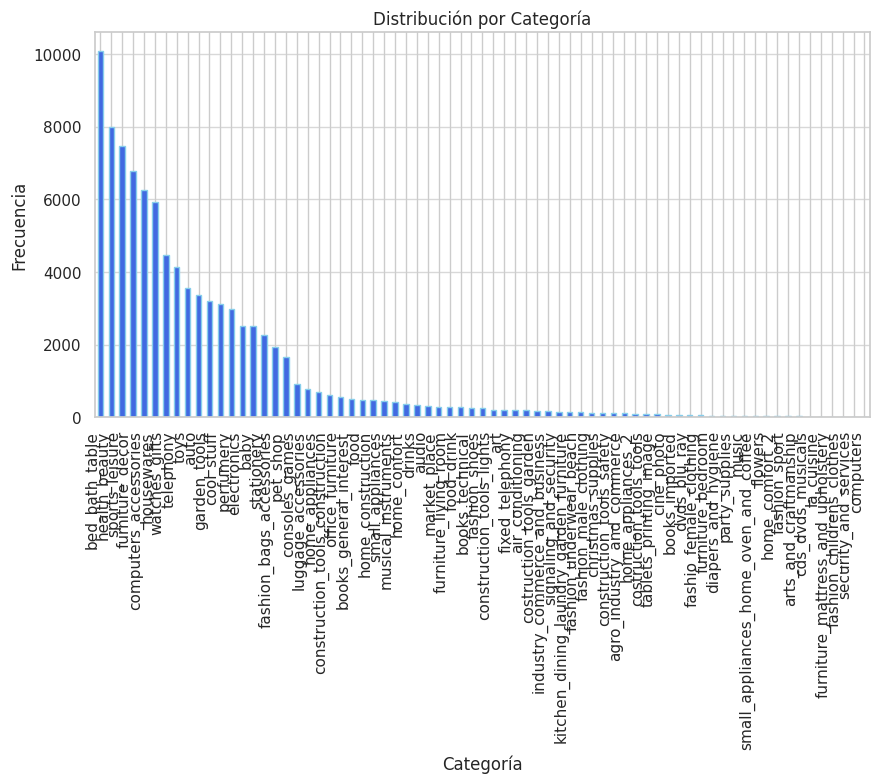

In [158]:
# Histograma de variables categóricas
plt.figure(figsize=(10, 5))
df['categoria_producto_ing'].value_counts().plot(kind='bar', edgecolor='skyblue', color='royalblue')
plt.title('Distribución por Categoría')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.75)
plt.xticks(rotation=90, ha='right')
plt.show()

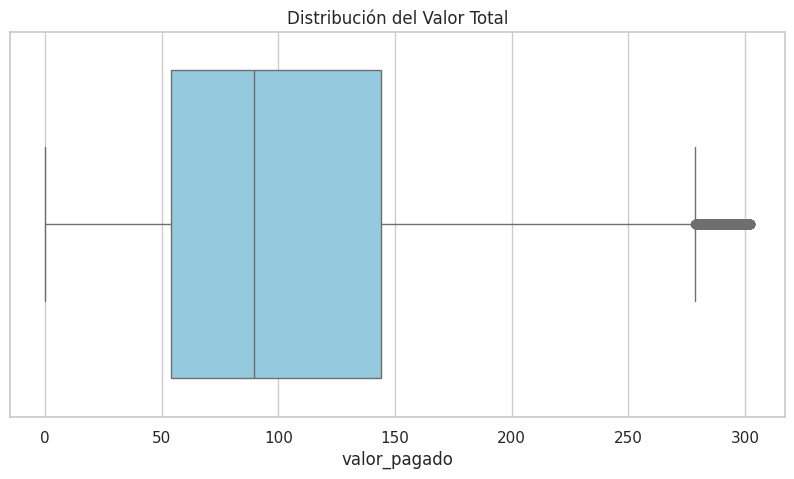

In [159]:
# Distribución del Valor Total (Precio + Valor Envío)
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['valor_pagado'], color = 'skyblue')
plt.title('Distribución del Valor Total')
plt.show()

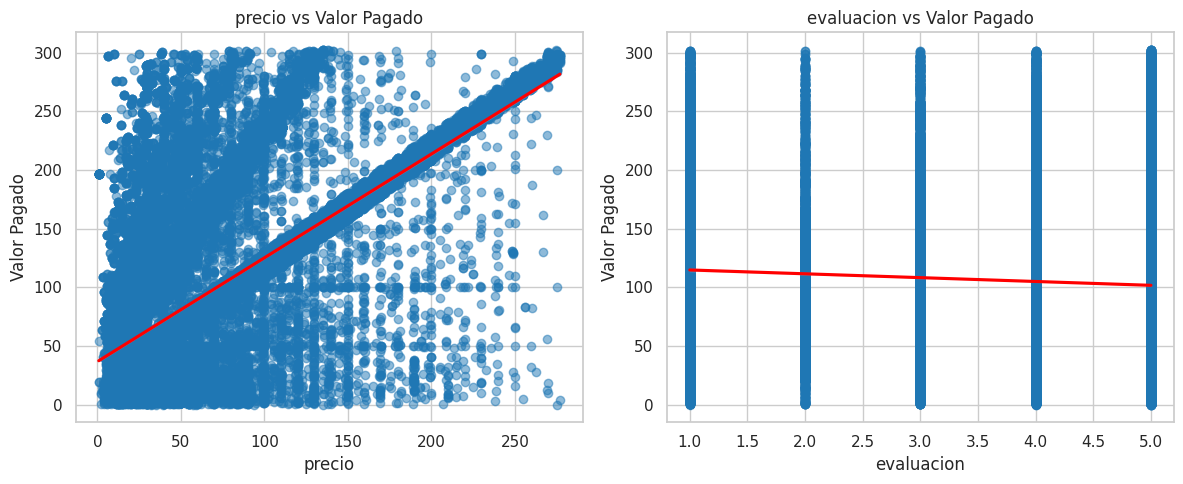

In [160]:
# Scatterplots
variables_predictoras= ['precio','evaluacion']
fig, axes = plt.subplots(1, len(variables_predictoras), figsize=(6 * len(variables_predictoras), 5))
axes = np.array(axes).flatten()
scatter_kws={'alpha': 0.05, 's': 2}

for i, var in enumerate(variables_predictoras):
    sns.regplot(ax=axes[i], x=df[var], y=df['valor_pagado'], scatter_kws={'alpha': 0.5}, line_kws={'color': 'red'})
    axes[i].set_title(f'{var} vs Valor Pagado')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Valor Pagado')

plt.tight_layout()
plt.show()

In [161]:
# Matriz de correlación
columnas_numericas = ['evaluacion', 'precio', 'valor_envio', 'valor_pagado']
correlaciones = df[columnas_numericas].corr()
correlaciones

,evaluacion,precio,valor_envio,valor_pagado
evaluacion,1.000000,0.029608,-0.024573,-0.068249
precio,0.029608,1.000000,0.301774,0.747239
valor_envio,-0.024573,0.301774,1.000000,0.284358
valor_pagado,-0.068249,0.747239,0.284358,1.000000


In [162]:
!pip install pingouin

In [163]:
import pingouin as pg
# Calculamos el coeficiente de Pearson (R)
parcial = pg.partial_corr(data=df, x='precio', y='valor_pagado', covar='evaluacion')
parcial

,n,r,CI95,p_val
pearson,91364,0.75134,"[0.75, 0.75]",0.0


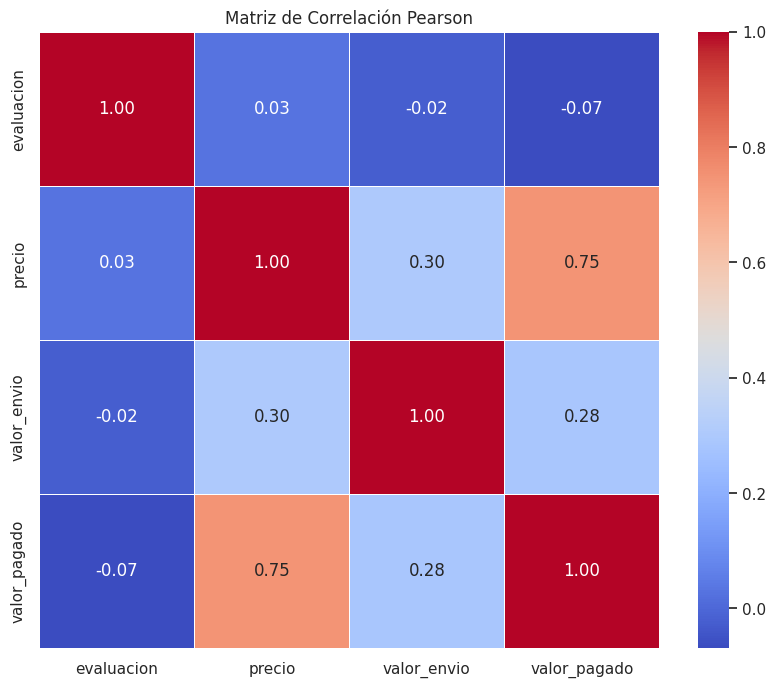

In [164]:
# Matriz corr Pearson
plt.figure(figsize=(10,8))
sns.heatmap(correlaciones, annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.5)
plt.title('Matriz de Correlación Pearson')
plt.show()

In [165]:
# Aplicar modelos con statsmodels
import statsmodels.api as sm

x=sm.add_constant(df['precio'])
y=df['valor_pagado']
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           valor_pagado   R-squared:                       0.558
Model:                            OLS   Adj. R-squared:                  0.558
Method:                 Least Squares   F-statistic:                 1.155e+05
Date:                Wed, 25 Feb 2026   Prob (F-statistic):               0.00
Time:                        01:33:17   Log-Likelihood:            -4.7343e+05
No. Observations:               91364   AIC:                         9.469e+05
Df Residuals:                   91362   BIC:                         9.469e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.5729      0.246    148.844      0.0

In [166]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Precciones del modelo
y_pred = model.predict(x)

# Cálculo de métricas
mae= mean_absolute_error(y,y_pred)
mse= mean_squared_error(y,y_pred)
rmse= np.sqrt(mse)
r2= r2_score(y,y_pred)

print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2:", r2)

MAE: 26.258207183259326
MSE: 1854.984590493517
RMSE: 43.06953204405078
R2: 0.5583656724876758


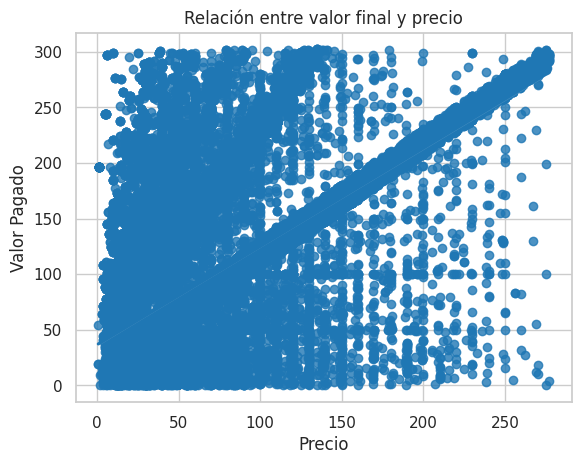

In [167]:
# Visualizamos regresión con Seaborn
sns.regplot(x='precio', y='valor_pagado', data=df)
plt.title('Relación entre valor final y precio')
plt.xlabel('Precio')
plt.ylabel('Valor Pagado')
plt.show()

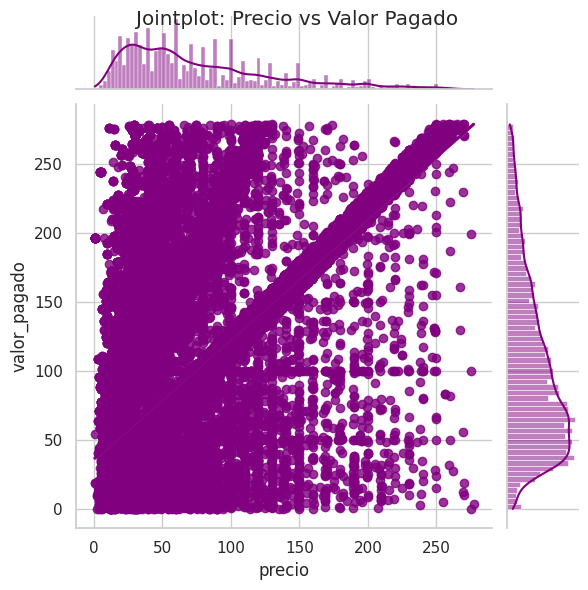

In [177]:
# Ya se utilizó heatmap, utilizamos jointplot
sns.jointplot(x='precio', y='valor_pagado', data=df, kind='reg',color='purple')
plt.suptitle('Jointplot: Precio vs Valor Pagado')
plt.show()

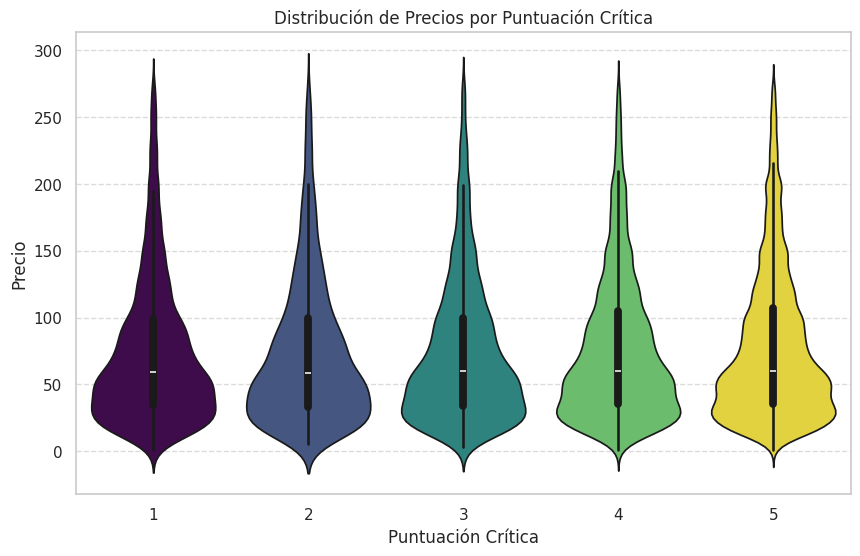

In [169]:
# Violinplot para ver la variación de precios según la puntuación crítica
plt.figure(figsize=(10, 6))
sns.violinplot(x='evaluacion', y='precio', data=df, hue='evaluacion', palette='viridis', legend=False)
plt.title('Distribución de Precios por Puntuación Crítica')
plt.xlabel('Puntuación Crítica')
plt.ylabel('Precio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

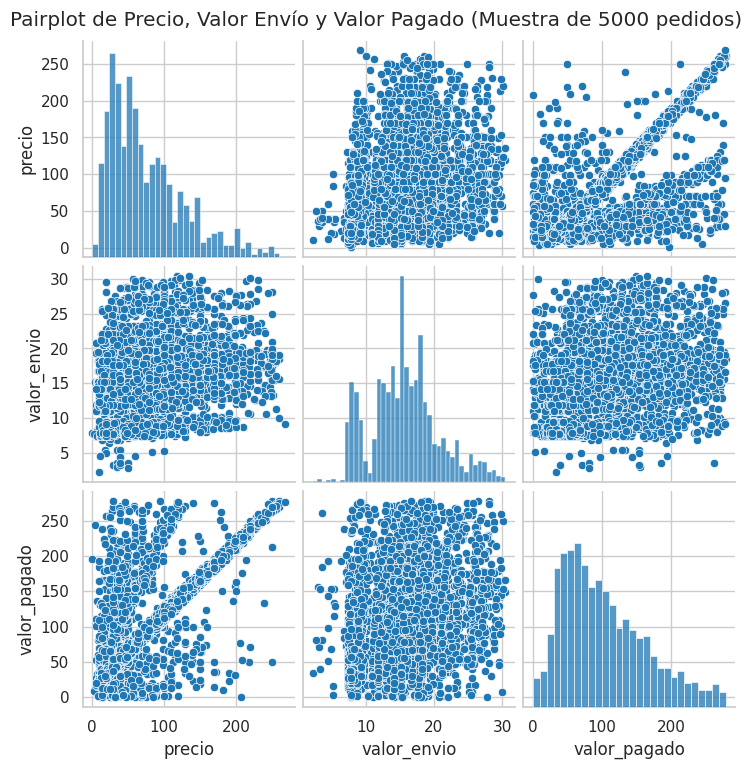

In [178]:
columnas_pairplot = ['precio', 'valor_envio', 'valor_pagado']
df_sample = df[columnas_pairplot].sample(n=5000, random_state=42)
sns.pairplot(df_sample)
plt.suptitle('Pairplot de Precio, Valor Envío y Valor Pagado (Muestra de 5000 pedidos)', y=1.02)
plt.show()

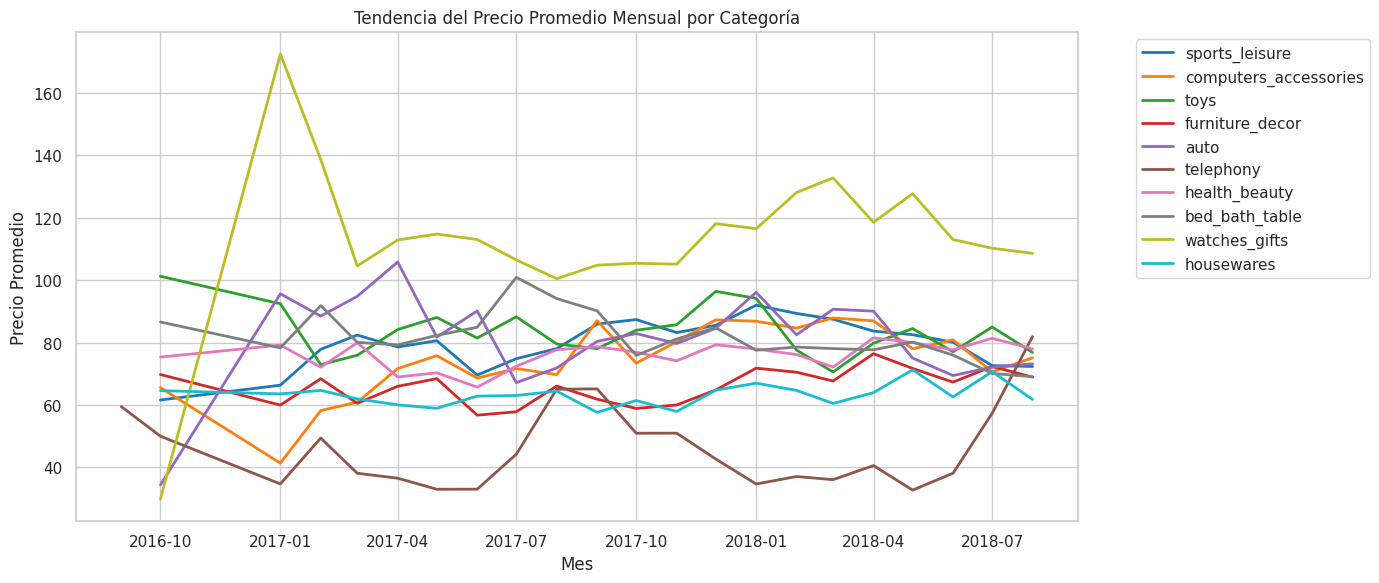

In [179]:
df_top = df_top.copy()
df_top['mes_orden'] = df_top['fecha_orden'].dt.to_period('M').dt.to_timestamp()

plt.figure(figsize=(14, 6))
sns.lineplot(
    data=df_top,
    x='mes_orden',
    y='precio',
    hue='categoria_producto_ing',
    errorbar=None,
    linewidth=2
)

plt.title('Tendencia del Precio Promedio Mensual por Categoría')
plt.xlabel('Mes')
plt.ylabel('Precio Promedio')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

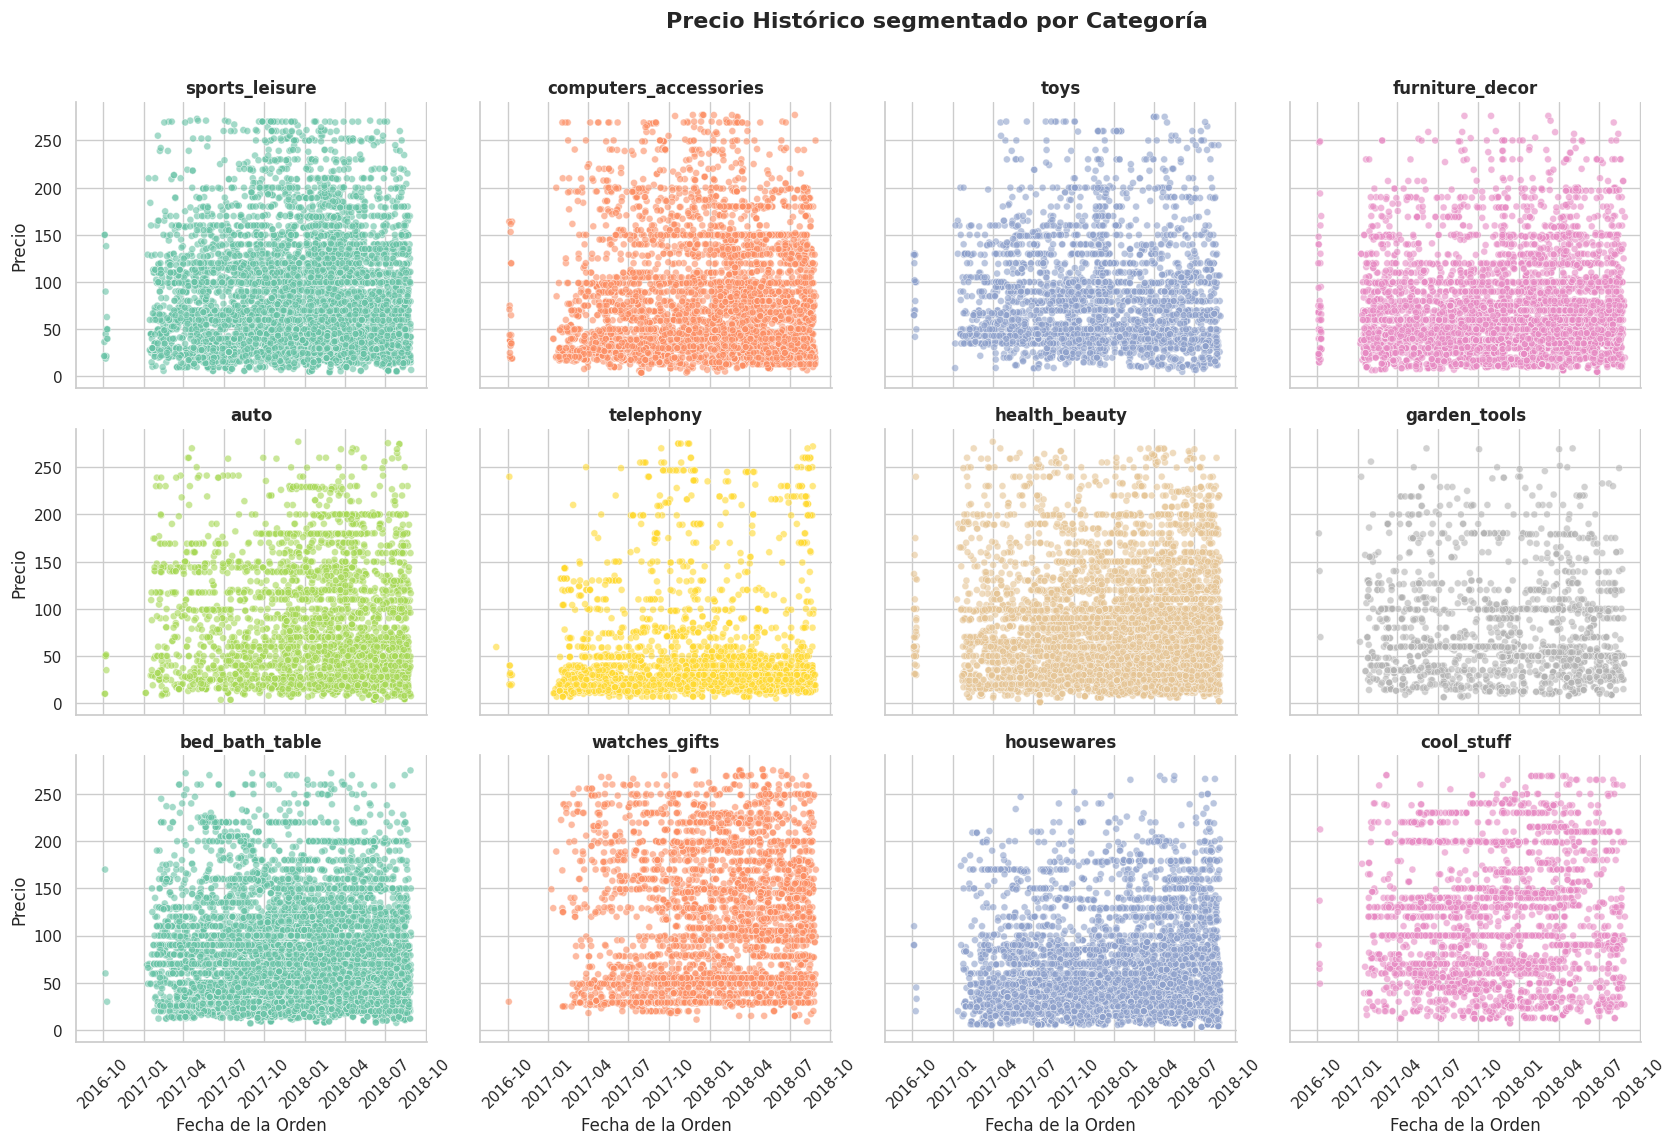

In [172]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.0)

top_categorias = df['categoria_producto_ing'].value_counts().nlargest(12).index
df_filtrado = df[df['categoria_producto_ing'].isin(top_categorias)]

g = sns.relplot(
    data=df_filtrado,
    x='fecha_orden',
    y='precio',
    col='categoria_producto_ing',
    col_wrap=4,
    hue='categoria_producto_ing',
    kind='scatter',
    palette='Set2',
    alpha=0.6,
    s=25,
    height=3.5,
    aspect=1.2,
)

g.set_titles(col_template="{col_name}", fontweight='bold')
g.set_axis_labels("Fecha de la Orden", "Precio")

for ax in g.axes.flat:
    for label in ax.get_xticklabels():
        label.set_rotation(45)

g.fig.suptitle('Precio Histórico segmentado por Categoría', y=1.05, fontsize=16, fontweight='bold')
g._legend.remove()

plt.show()

In [173]:
g.savefig("precio_por_categoria.png", dpi=300, bbox_inches='tight')
plt.show()